In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [26]:
matches_df = pd.read_csv('cleaneddata/cleaned_matches.csv')
matches_df.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type,match_day,match_month,match_year
0,Canada,United States of America,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,United States of America,0,7,Group,1,6,2024
1,Papua New Guinea,West Indies,2,Providence Stadium,Providence,West Indies,field,RL Chase,West Indies,0,5,Group,2,6,2024
2,Sri Lanka,South Africa,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,South Africa,0,6,Group,3,6,2024
3,Afghanistan,Uganda,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Afghanistan,125,0,Group,3,6,2024
4,Nepal,Netherlands,7,Grand Prairie Stadium,Dallas,Netherlands,field,TJG Pringle,Netherlands,0,6,Group,4,6,2024


In [27]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team1            49 non-null     object
 1   team2            49 non-null     object
 2   match_number     49 non-null     int64 
 3   venue            49 non-null     object
 4   city             49 non-null     object
 5   toss_winner      49 non-null     object
 6   toss_decision    49 non-null     object
 7   player_of_match  49 non-null     object
 8   winner           49 non-null     object
 9   winner_runs      49 non-null     int64 
 10  winner_wickets   49 non-null     int64 
 11  match_type       49 non-null     object
 12  match_day        49 non-null     int64 
 13  match_month      49 non-null     int64 
 14  match_year       49 non-null     int64 
dtypes: int64(6), object(9)
memory usage: 5.9+ KB


In [28]:
deliveries_df = pd.read_csv('cleaneddata/deliveries_cleaned.csv')
deliveries_df.head()

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,day,month
0,1,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,4,0,0,0,0,0,0,NaN,NaN,1,6
1,1,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,0,0,0,0,0,0,NaN,NaN,1,6
2,1,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,1,0,0,0,1,0,NaN,NaN,1,6
3,1,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,0,0,0,0,0,0,NaN,NaN,1,6
4,1,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,0,0,0,0,0,0,NaN,NaN,1,6


In [29]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11443 entries, 0 to 11442
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_number      11443 non-null  int64  
 1   venue             11443 non-null  object 
 2   innings           11443 non-null  int64  
 3   ball              11443 non-null  float64
 4   batting_team      11443 non-null  object 
 5   bowling_team      11443 non-null  object 
 6   striker           11443 non-null  object 
 7   non_striker       11443 non-null  object 
 8   bowler            11443 non-null  object 
 9   runs_off_bat      11443 non-null  int64  
 10  extras            11443 non-null  int64  
 11  wides             11443 non-null  int64  
 12  noballs           11443 non-null  int64  
 13  byes              11443 non-null  int64  
 14  legbyes           11443 non-null  int64  
 15  penalty           11443 non-null  int64  
 16  wicket_type       681 non-null    object

In [32]:
inning_data = deliveries_df.groupby(['match_number', 'innings']).agg(
    runs_off_bat=('runs_off_bat', 'sum'),
    extras=('extras', 'sum'),
    wickets=('wicket_type',(lambda x: x.notna().sum())),
    overs=('ball', (lambda x: x.max()))
)
inning_data['total_runs'] = inning_data['runs_off_bat'] + inning_data['extras']
inning_data.head(10)

runs_off_bat  extras  wickets  overs  total_runs
match_number innings                                                  
1            1                 184      10        5   19.7         194
             2                 178      19        3   17.4         197
2            1                 127       9        8   19.7         136
             2                 135       2        5   18.6         137
3            1                 104       5       10   19.4         109
             2                 100       9        6   19.6         109
4            1                  71       6       10   19.1          77
             2                  74       6        4   16.2          80
5            1                 173      10        5   19.6         183
             2                  49       9       10   15.6          58

<Axes: xlabel='total_runs', ylabel='Count'>

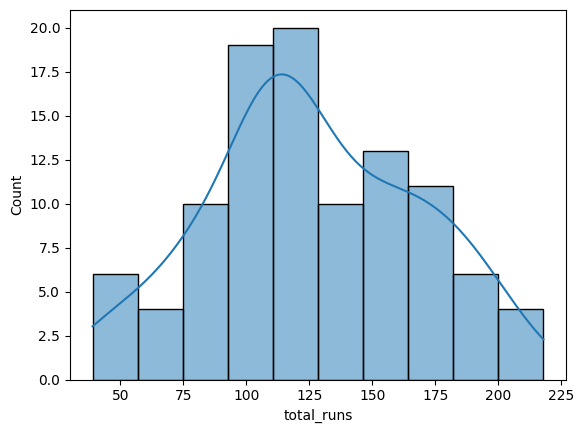

In [33]:
sns.histplot(inning_data['total_runs'],kde=True,bins=10)